# Part I Exploratory - Understanding Borrower Behavior: Analysing Prosper Loan Data
## by Lucas Comora

## Introduction

In this project, we explore and analyze the Prosper Loan Dataset, a rich collection of loan data made available by Prosper Marketplace. The dataset contains detailed information on over 100,000 loans issued between 2005 and 2014, including borrower characteristics, loan details and performance metrics. 

Our goal is to conduct a structured exploratory data analysis (EDA) to uncover patterns, trends, and insights hidden within the data. 

We aim to answer questions related to: 

* What Factors influence the interest rate (BorrowerAPR) a borrower receives? 
* How do borrower attributes such as income, credit rating, and employment status relate to the terms and outcomes of loans?
* What multivariate relationships can we discover that help explain lending behavior and risk assessment? 

This project is structured in two main parts: Part 1 - Exploratory, focused on data understanding and pattern discovery, and Part 2 - Explanatory, where we narrow down to key takeways and compelling insights. 

## Preliminary Wrangling

In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df = pd.read_csv('prosperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [53]:
df.shape

(113937, 81)

In [54]:
df.dtypes.head(50)

ListingKey                             object
ListingNumber                           int64
ListingCreationDate                    object
CreditGrade                            object
Term                                    int64
LoanStatus                             object
ClosedDate                             object
BorrowerAPR                           float64
BorrowerRate                          float64
LenderYield                           float64
EstimatedEffectiveYield               float64
EstimatedLoss                         float64
EstimatedReturn                       float64
ProsperRating (numeric)               float64
ProsperRating (Alpha)                  object
ProsperScore                          float64
ListingCategory (numeric)               int64
BorrowerState                          object
Occupation                             object
EmploymentStatus                       object
EmploymentStatusDuration              float64
IsBorrowerHomeowner               

In [55]:
df.describe(include='all').T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ListingKey,113937,113066,17A93590655669644DB4C06,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ListingNumber,113937.0,NaN,NaN,NaN,627885.692506,328076.236386,4.0,400919.0,600554.0,892634.0,1255725.0
ListingCreationDate,113937,113064,2013-10-02 17:20:16.550000000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditGrade,28953,8,C,5649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Term,113937.0,NaN,NaN,NaN,40.830248,10.436212,12.0,36.0,36.0,36.0,60.0
LoanStatus,113937,12,Current,56576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClosedDate,55089,2802,2014-03-04 00:00:00,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BorrowerAPR,113912.0,NaN,NaN,NaN,0.218828,0.080364,0.00653,0.15629,0.20976,0.28381,0.51229
BorrowerRate,113937.0,NaN,NaN,NaN,0.192764,0.074818,0.0,0.134,0.184,0.25,0.4975
LenderYield,113937.0,NaN,NaN,NaN,0.182701,0.074516,-0.01,0.1242,0.173,0.24,0.4925


In [56]:
# utils.py
def clean_prosper_data(df):
    """
    Cleans the Prosper dataset by selecting important columns and dropping missing values.
    """
    important_cols = ['BorrowerAPR', 'ProsperRating (Alpha)', 'IncomeRange',
                      'LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'BorrowerRate', 'LoanStatus']
    df_clean = df[important_cols].dropna().reset_index(drop=True)
    return df_clean

In [57]:
with open("utils.py", "w") as f:
    f.write("""
def clean_prosper_data(df):
    '''
    Cleans the Prosper dataset by selecting important columns and dropping missing values.
    '''
    important_cols = ['BorrowerAPR', 'ProsperRating (Alpha)', 'IncomeRange',
                      'LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'BorrowerRate', 'LoanStatus']
    df_clean = df[important_cols].dropna().reset_index(drop=True)
    return df_clean
""")

In [58]:
df_clean = clean_prosper_data(df)

In [59]:
df_clean.dtypes.head(50)

BorrowerAPR              float64
ProsperRating (Alpha)     object
IncomeRange               object
LoanOriginalAmount         int64
DebtToIncomeRatio        float64
StatedMonthlyIncome      float64
Term                       int64
BorrowerRate             float64
LoanStatus                object
dtype: object

In [60]:
df_clean.isnull().sum().sort_values(ascending=False).head(10)

BorrowerAPR              0
ProsperRating (Alpha)    0
IncomeRange              0
LoanOriginalAmount       0
DebtToIncomeRatio        0
StatedMonthlyIncome      0
Term                     0
BorrowerRate             0
LoanStatus               0
dtype: int64

In [61]:
df.isnull().sum().sort_values(ascending=False).head(10)

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperLoans                       91852
TotalProsperPaymentsBilled              91852
dtype: int64

### What is the structure of your dataset?

> The dataset contains 113,937 rows and 81 columns, including a mixture of numerical and categorical variables. Some columns, such as CreditGrade, have significant missing data. Others, like LoanStatus, BorrowerAPR, BorrowerRate, and Term, are clean and look useful for analysis. There are date columns (e.g. ListingCreationDate, ClosedDate) and financial figures (e.g. BorrowerRate, LenderYield, ProsperRating).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is: BorrowerAPR — Annual Percentage Rate charged to the borrower.
We want to explore what affects APR: Does it vary with loan term, creditworthiness, employment status, income, or other loan characteristics?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Helpful features for this analysis include:
* ProsperRating (Alpha) — creditworthiness indicator (categorical)
* EmploymentStatus
* IncomeRange
* LoanStatus
* BorrowerRate
* LenderYield
* Term
* ListingCategory (numeric)

## Univariate Exploration


### Observations:

### What does the distribution of BorrowerAPR look like?

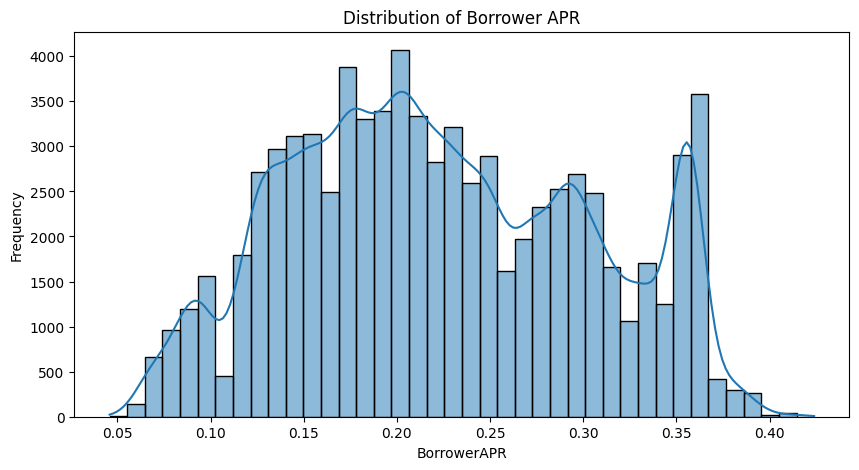

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['BorrowerAPR'], kde=True, bins=40, color='tab:blue')
plt.title('Distribution of Borrower APR')
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.show()

>The BorrowerAPR is right-skewed.
Most borrowers fall between ~0.1 and 0.3.

### What is the distribution of Loan Terms?

/tmp/ipykernel_13/923483827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Term', data=df_clean, palette='Blues')


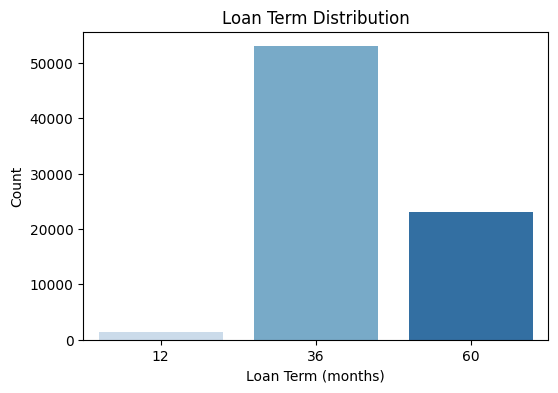

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Term', data=df_clean, palette='Blues')
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (months)')
plt.ylabel('Count')
plt.show()

> The most loans are 36 or 60 months, with a very few 12-month loans. Term may have a strong influence on rates and repayment. No transformations were performed yet.

### How are Prosper Ratings distributed?

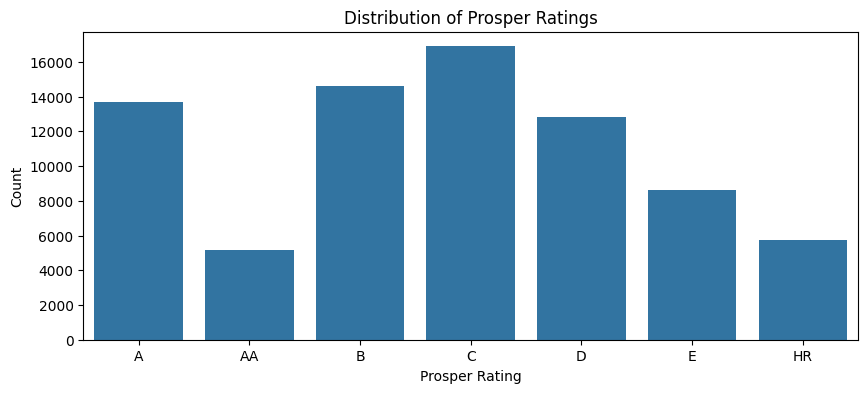

In [64]:
plt.figure(figsize=(10, 4))
sns.countplot(x='ProsperRating (Alpha)', data=df_clean, order=sorted(df['ProsperRating (Alpha)'].dropna().unique()))
plt.title('Distribution of Prosper Ratings')
plt.xlabel('Prosper Rating')
plt.ylabel('Count')
plt.show()

> Borrowers are spread across ratings, with more clustering in B-D grades. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The BorrowerAPR is right-skewed. Most borrowers fall between ~0.1 and 0.3. To ensure the accuracy of our visual exploration, we created a cleaned subset of the data by removing rows with missing values in critical variables such as BorrowerAPR, ProsperRating, and IncomeRange.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Observed skew in BorrowerAPR and missing values in ProsperRating (Alpha). Changes and operations may be adressed in bivariate/multivariate analysis. 

## Bivariate Exploration


#### How does BorrowerAPR vary with ProsperRating (Alpha)?

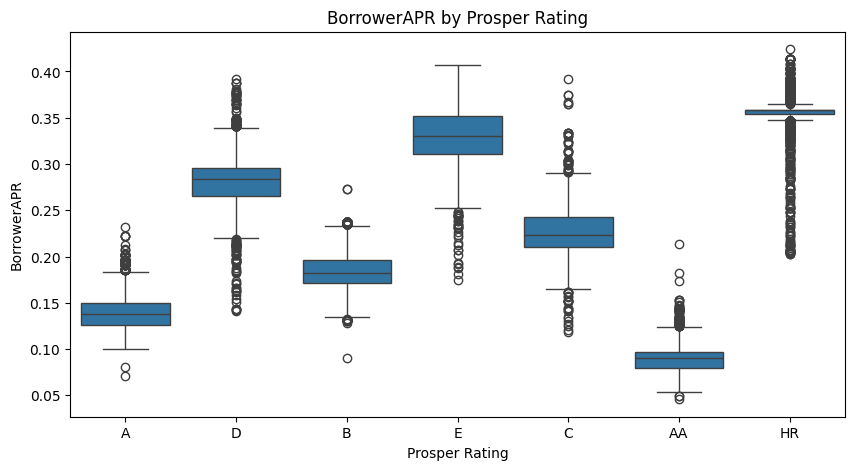

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='ProsperRating (Alpha)', y='BorrowerAPR', data=df_clean)
plt.title('BorrowerAPR by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('BorrowerAPR')
plt.show()

>There is a clear inverse relationship between the Prosper Rating and the BorrowerAPR. Borrowers with lower risk (higher ratings like 'A' or 'AA') tend to receive significantly lower APRs, while those with lower ratings (e.g., 'E' or 'HR') are charged much higher APRs. This confirms that the platform adjusts interest rates based on the perceived credit risk.

#### Is there a correlation between BorrowerRate and BorrowerAPR?

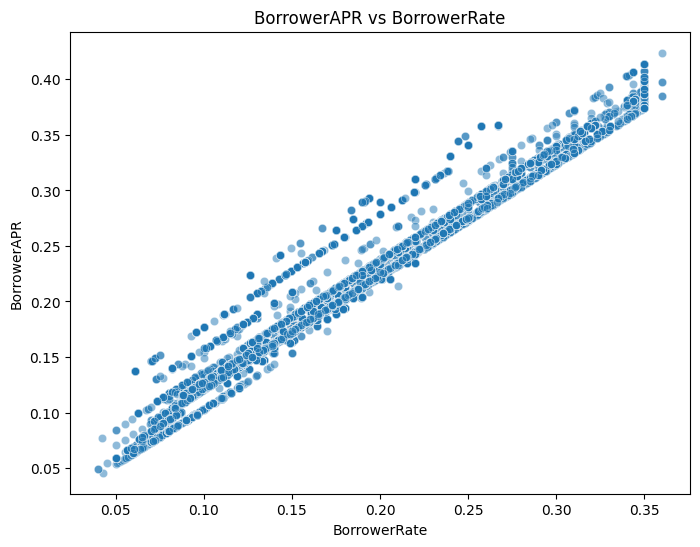

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BorrowerRate', y='BorrowerAPR', data=df_clean, alpha=0.5)
plt.title('BorrowerAPR vs BorrowerRate')
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.show()

> There is a strong positive linear relationship between BorrowerRate and BorrowerAPR. This suggests that both metrics reflect similar assessments of borrower risk, although APR includes additional fees and costs beyond just the interest rate.

#### What does loan status look like across loan terms?

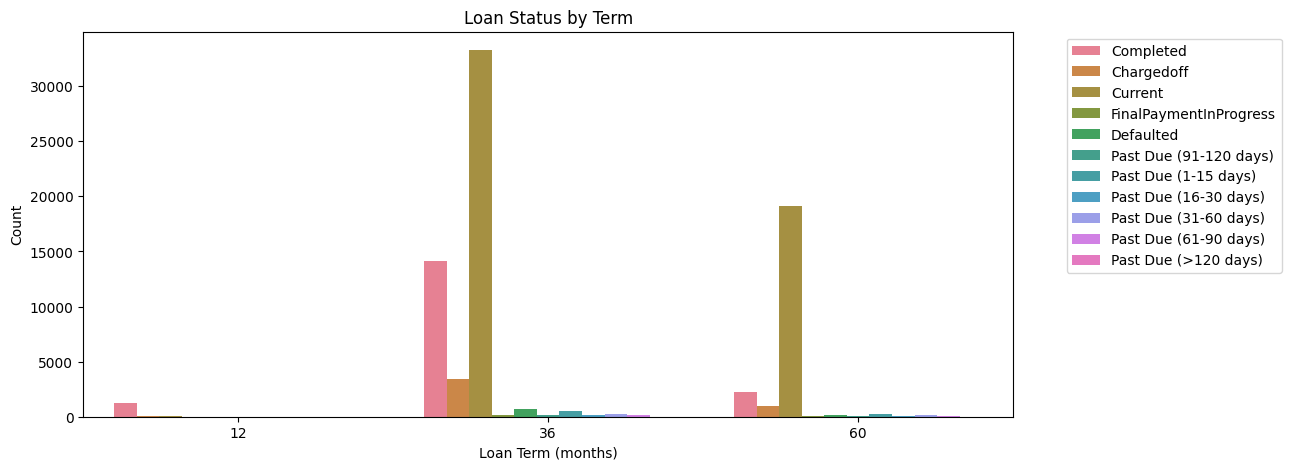

In [67]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_clean, x='Term', hue='LoanStatus', order=[12, 36, 60])
plt.title('Loan Status by Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

> Most loans are concentrated in the 36 and 60-month categories. Longer terms, especially 60 months, have a higher count of "Chargedoff" and "Defaulted" statuses, indicating that longer-term loans may be riskier or harder to repay. Shorter terms (12 months) are less common and appear to have better performance.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a clear inverse relationship with higher ratings like AA, A, associated with lower APRs. Additionally, lower ratings, E, HR, face higher APRs. There is a strong positive correlation between BorrowerRate and BorrowerAPR, despite some outliers and noise. For the loan status across loan terms, 36 and 60-month terms dominate, and most of 36-month loans are current or completed. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, several interesting relationships stood out. Borrowers with higher income levels generally received better Prosper Ratings, suggesting that income is positively correlated with perceived creditworthiness. 
Unemployed or part-time workers were more commonly approved for shorter-term loans, likely due to higher risk. 
As expected, longer-term loans tended to have higher original amounts. Most 60-month loans had higher principal amounts compared to 36 or 12-month terms.
These patterns reveal how Prosper possibly uses multiple borrower attributes together to assess risk and set loan terms.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

#### How does BorrowerAPR vary by ProsperRating, segmented by Term?

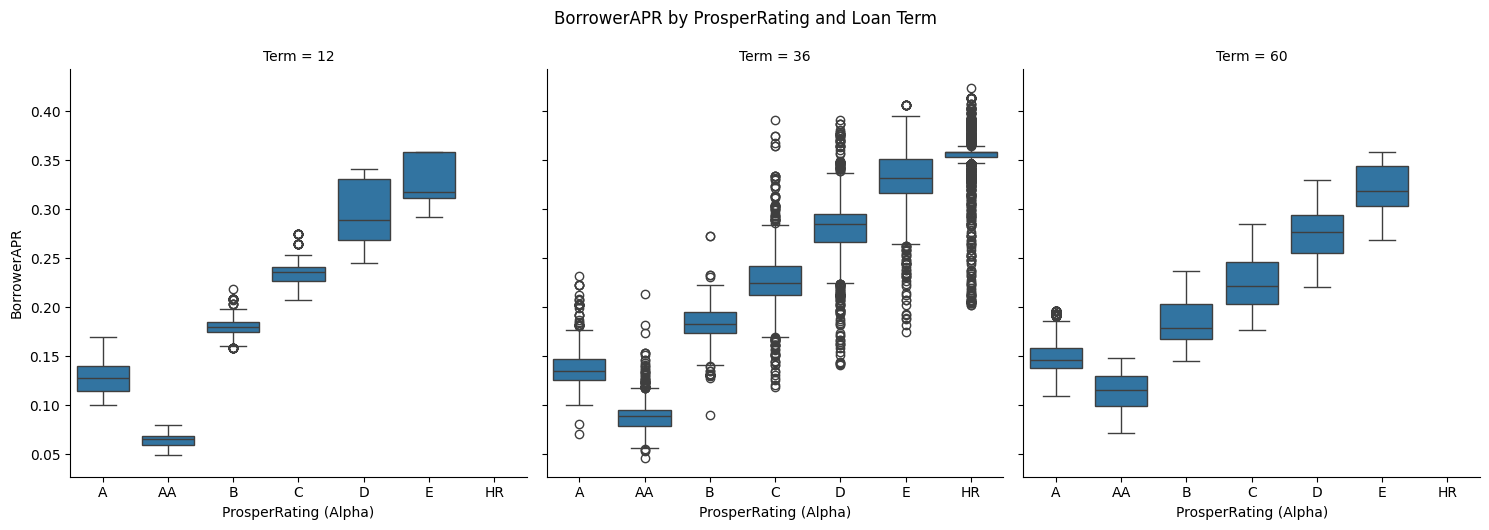

In [68]:
g = sns.FacetGrid(df_clean, col='Term', height=5)
g.map(sns.boxplot, 'ProsperRating (Alpha)', 'BorrowerAPR', order=sorted(df['ProsperRating (Alpha)'].dropna().unique()))
g.fig.suptitle('BorrowerAPR by ProsperRating and Loan Term', y=1.05)
plt.show()

> Across all terms, APR decreases with better Prosper Ratings. However, for longer terms (60 months), there is a slightly wider distribution of APRs even for higher ratings, suggesting more pricing flexibility or perceived risk. Shorter loans (12 months) show tighter APR ranges.

#### What’s the interaction between APR, Prosper Rating, and Income Range?

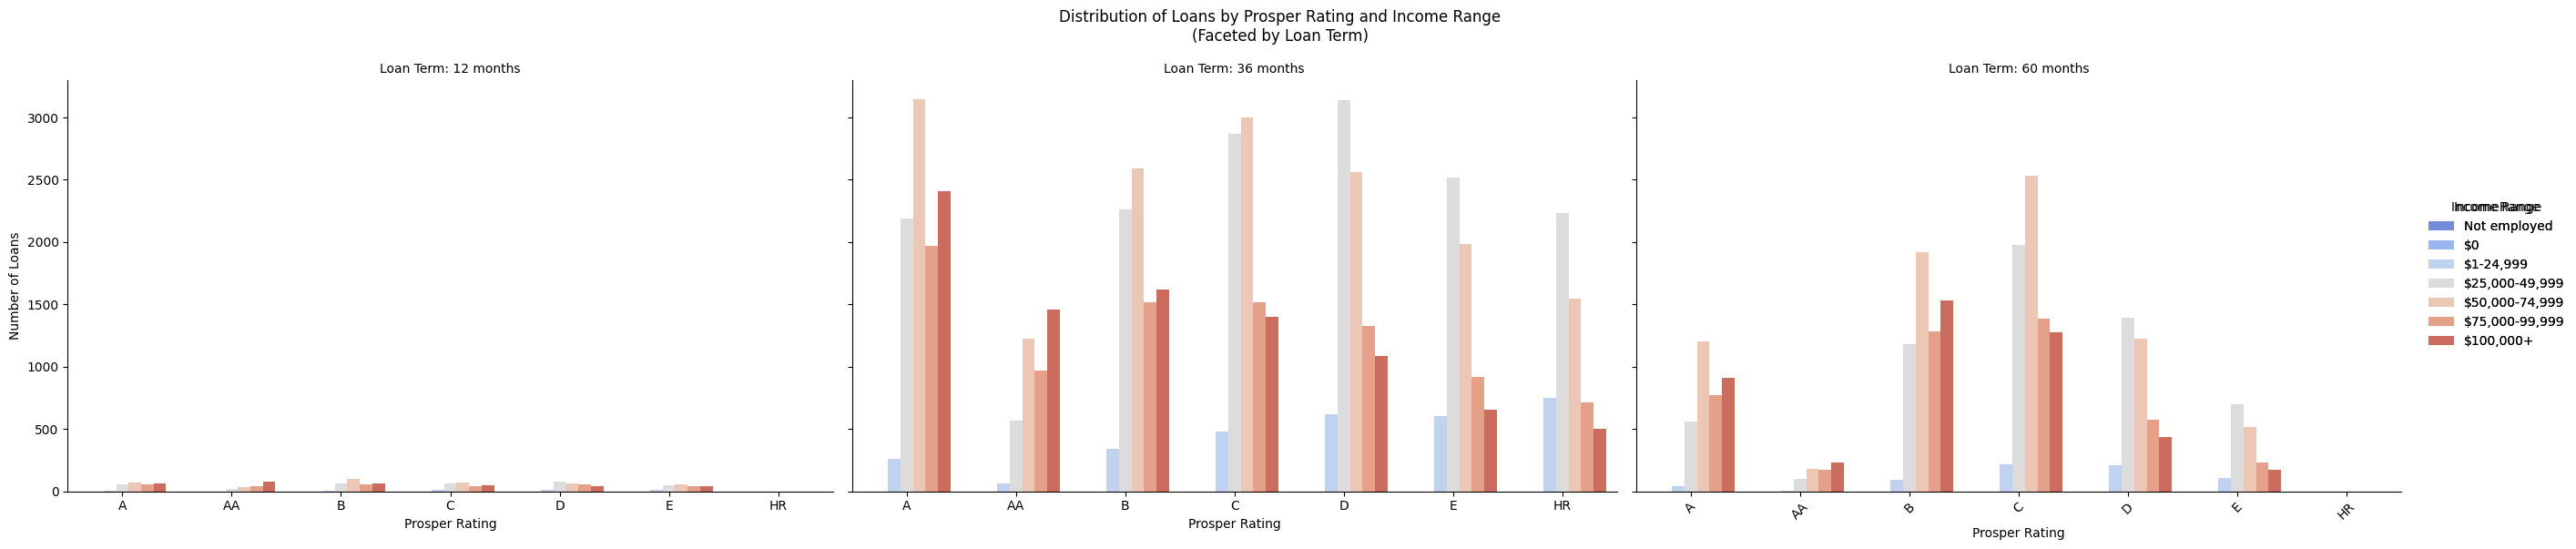

In [69]:
#Filter and order the data
rating_order = sorted(df_clean['ProsperRating (Alpha)'].unique())
income_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999',
                '$50,000-74,999', '$75,000-99,999', '$100,000+']
term_order = [12, 36, 60]

#Create the facet bar chart using a catplot
g = sns.catplot(
    data=df_clean,
    x='ProsperRating (Alpha)',
    hue='IncomeRange',
    col='Term',
    kind='count',
    height=6,
    aspect=1.4,
    order=rating_order,
    hue_order=income_order,
    col_order=term_order,
    palette='coolwarm'
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Loans by Prosper Rating and Income Range\n(Faceted by Loan Term)')
g.set_axis_labels("Prosper Rating", "Number of Loans")
g.set_titles("Loan Term: {col_name} months")
g.add_legend(title='Income Range')
plt.xticks(rotation=45)
plt.show()

> Borrowers across all income ranges and loan terms are present in each Prosper Rating. However, higher-income individuals ("$100,000+") tend to be concentrated in higher Prosper Ratings. This implies a correlation between income and creditworthiness, and also suggests higher-income individuals are more likely to receive better-rated loans.

#### What is the relationship between loan amount, APR, and borrower characteristics like income and rating?

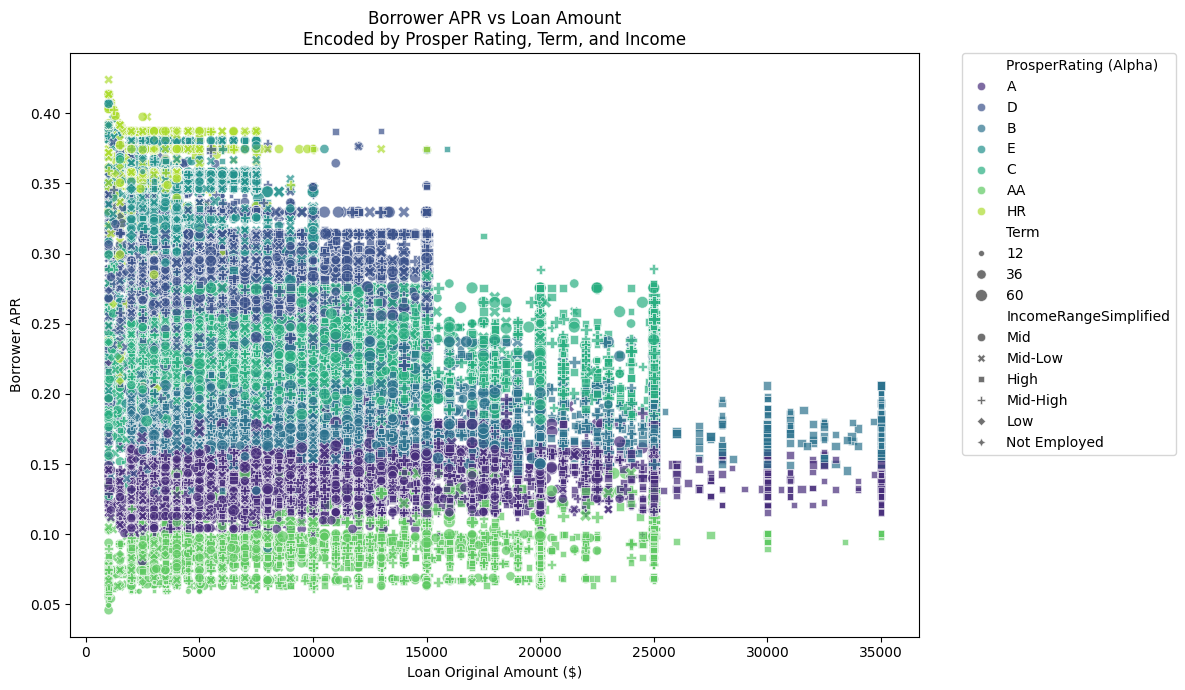

In [70]:
scatter_df = df_clean.copy()

# Simplify income range categories
income_map = {
    'Not employed': 'Not Employed',
    '$0': 'No Income',
    '$1-24,999': 'Low',
    '$25,000-49,999': 'Mid-Low',
    '$50,000-74,999': 'Mid',
    '$75,000-99,999': 'Mid-High',
    '$100,000+': 'High'
}
scatter_df.loc[:, 'IncomeRangeSimplified'] = scatter_df['IncomeRange'].map(income_map)

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=scatter_df,
    x='LoanOriginalAmount',
    y='BorrowerAPR',
    hue='ProsperRating (Alpha)',
    size='Term',
    style='IncomeRangeSimplified',
    alpha=0.7,
    palette='viridis'
)

plt.title('Borrower APR vs Loan Amount\nEncoded by Prosper Rating, Term, and Income')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower APR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()



>There’s a trend where higher loan amounts tend to correlate with lower APRs, especially for borrowers with higher Prosper Ratings and higher income brackets. Borrowers with poor ratings receive smaller loans at higher APRs. This visualization effectively shows how income and rating influence loan conditions.

#### How are key financial indicators interrelated across Prosper Ratings?

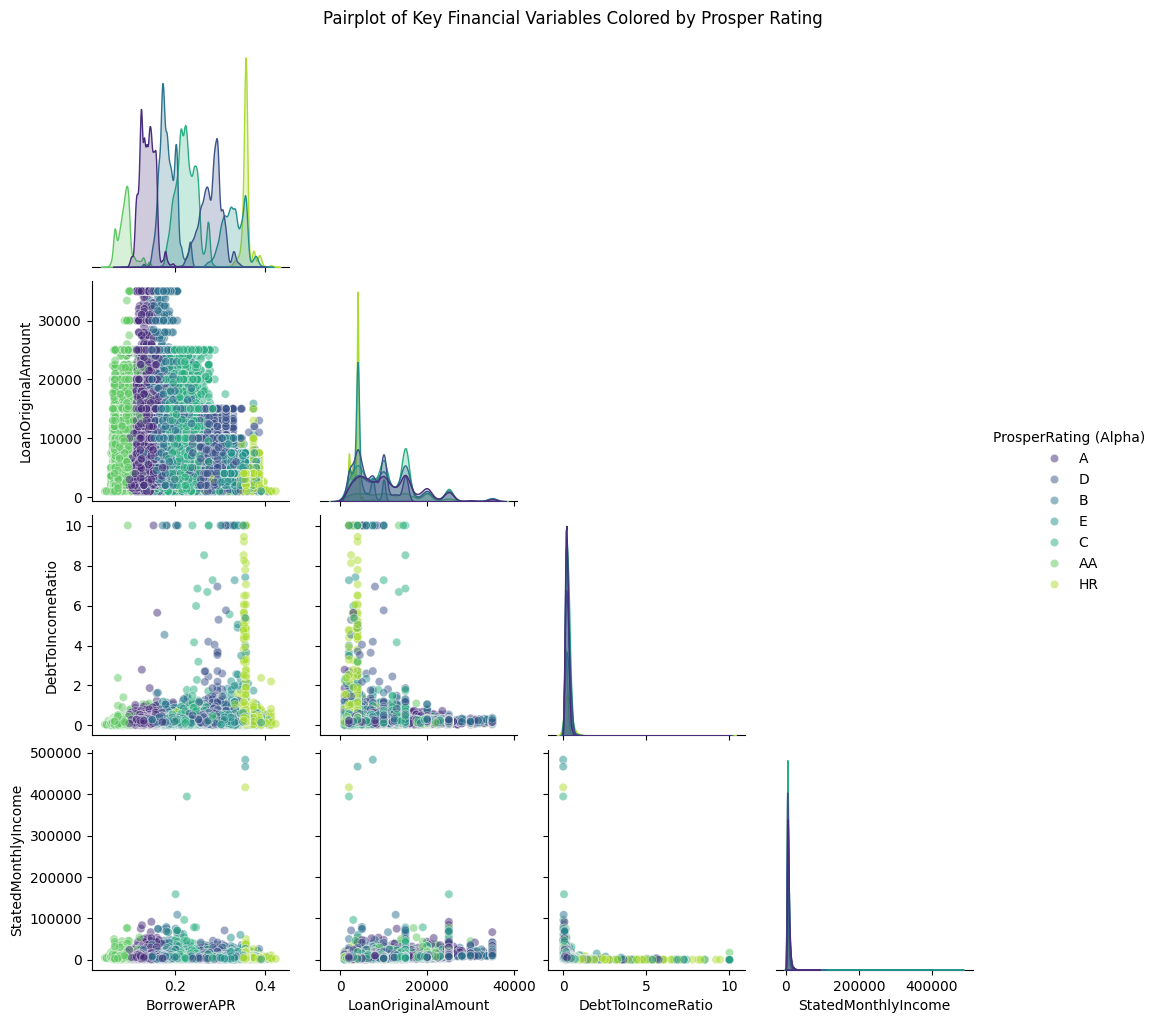

In [71]:
#Prepare and clean data
pairplot_df = df_clean[
    (df_clean['BorrowerAPR'].notnull()) &
    (df_clean['LoanOriginalAmount'].notnull()) &
    (df_clean['DebtToIncomeRatio'].notnull()) &
    (df_clean['StatedMonthlyIncome'].notnull()) &
    (df_clean['ProsperRating (Alpha)'].notnull())
][['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'ProsperRating (Alpha)']]

#Plot the data
sns.pairplot(
    data=pairplot_df,
    hue='ProsperRating (Alpha)',
    palette='viridis',
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)

plt.suptitle('Pairplot of Key Financial Variables Colored by Prosper Rating', y=1.02)
plt.show()


> The pairplot reveals a few interesting patterns. Borrowers with higher APRs generally have higher debt-to-income ratios and lower stated incomes. Additionally, loan amounts are more spread out for higher-rated borrowers. This plot reinforces earlier findings, while also offering more subtle insights into the relationship between income, loan size, and rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, analyzing multiple variables together revealed strong and consistent relationships. Loan Amount, APR, and Prosper Rating emerged as a powerful triad of financial indicators. Borrowers with better Prosper Ratings not only secured lower APRs but also tended to receive higher loan amounts.
Additionally, Stated Monthly Income and Debt-to-Income Ratio provided essential context. For example, two borrowers with the same income could face very different APRs based on their debt obligations — showing how these features complement each other in assessing credit risk.
Loan Term also played a significant role: among borrowers with similar Prosper Ratings and Income Ranges, longer-term loans tended to have slightly higher APRs, reflecting the added risk over time.


### Were there any interesting or surprising interactions between features?

> Yes, a few notable interactions stood out. Borrowers with low income but relatively high Prosper Ratings often still received competitive APRs, likely due to other strong financial indicators like low debt or excellent credit history.

>Some borrowers in the highest income brackets ($100,000+) had surprisingly high APRs, suggesting that income alone doesn’t guarantee favorable loan conditions. These might be edge cases involving high risk, high debt, or poor credit history.

> The "Not employed" income group sometimes still received mid-tier Prosper Ratings and modest loan amounts, hinting at other hidden factors like assets, cosigners, or past credit behavior.

## Conclusions


#### Key Findings

* BorrowerAPR is clearly influenced by multiple factors — especially Prosper Rating, Income Range, and Loan Term.

* Higher-rated borrowers tend to:

>Have lower APRs

>Get larger loans

>Appear in higher income brackets

* Loan terms interact meaningfully with risk and repayment — longer terms are often associated with larger amounts but also carry slightly higher APRs.

* Debt-to-Income Ratio is a helpful contextual metric: even high earners can be risky if their debt load is large.

* The dataset includes some outliers and exceptions, especially among income levels — income alone does not guarantee favorable lending terms.

##### Reflection on the Process

We began with univariate exploration to understand the distributions and identify data quality issues.

Bivariate plots helped us compare variable relationships and identify trends across categories.

Multivariate visualizations (facet plots, scatterplots with multiple encodings, and a pairplot) allowed us to uncover complex interactions and deepen our understanding of borrower profiles.